# Proyek Analisis Data: PRSA_Data_Guanyuan_20130301-20170228
- **Nama:** Muhammad Ricky Rizaldi
- **Email:** mrickyrizaldi@gmail.com
- **ID Dicoding:** mrickyjrs


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola konsentrasi PM2.5 bervariasi antara musim panas, musim dingin, musim gugur, dan musim semi dalam rentang waktu 2013-2017?
- Pertanyaan 2 : Bagaimana pola konsentrasi PM2.5 selama weekday dan weekend dalam rentang waktu 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [102]:
df = pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv")
df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Pada proses Gathering Data dilakukan pembuatan dataframe dari dataset yang digunakan yaitu dataset air quality pada stasiun pembacaan Guanyuan dengan periode waktu tahun 2013-2017, pada data tersebut terlihat beberapa fitur seperti tahun, bulan, hari dan jam serta fitur fitur parameter kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) dan kondisi cuaca.
- Dataset ini cocok dalam memberikan data untuk menjawab pertanyaan analisis karena terdapat data PM2.5 yang merupakan salah satu polutan paling berbahaya dan terdapat data time series yang dapat digunakan untuk mengkategorikan musim dan hari. Selain itu dataset ini berlatar di sebuah daerah di tiongkok yang memiliki 4 musim sehingga cocok dengan pertanyaan 1

### Assessing Data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [104]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [105]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [106]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [107]:
# fitur numerikal kualitas udara untuk deteksi outliersnya
numerikal_fitur = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Deteksi Outliers
for col in numerikal_fitur:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Hitung jumlah dan proporsi outliers
    total_data = len(df)
    count = len(outliers)
    prop = (count / total_data) * 100

    # Cetak hasil
    if count > 0:
        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")
    else:
        print(f"Fitur {col}: Jumlah outliers = 0")

Fitur PM2.5: Jumlah outliers = 1504, Proporsi = 4.29%
Fitur PM10: Jumlah outliers = 1186, Proporsi = 3.38%
Fitur SO2: Jumlah outliers = 3020, Proporsi = 8.61%
Fitur NO2: Jumlah outliers = 664, Proporsi = 1.89%
Fitur CO: Jumlah outliers = 2167, Proporsi = 6.18%
Fitur O3: Jumlah outliers = 1343, Proporsi = 3.83%


**Insight:**
- dataset terdiri dari 35064 data dan 18 fitur (5 int, 11 Float, dan 2 Object) dan beberapa fitur memiliki jumlah data berbeda menandakan ada data yang hilang
- data dengan missing value dengan jumlah besar seperti (PM2.5	= 616, PM10	= 429, SO2	= 474, NO2	= 659, CO = 1753, O3	= 1173) sehingga perlu penanganan untuk mengatasi missing value
- tidak ada data duplikat sehingga tidak perlu penanganan duplikat data
- pada deskripsi statistik data seperti PM2.5, PM10, SO2, NO2, CO, O3 terlihat memiliki data maximum yang cukup jauh berbeda dibanding 75% data menandakan adanya outliers atau kondisi yang ekstrem dari pengukuran dengan proporsi kurang dari 10% dari total data

### Cleaning Data

In [108]:
# Penanganan Missing value
# buat dataframe baru
df_new = df.copy()

# Menjadikan fitur datetime kemudian ubah menjadi indeks
df_new['datetime'] = pd.to_datetime(df_new[['year', 'month', 'day', 'hour']])
df_new.set_index('datetime', inplace=True)

# Menggunakan metode interpolasi berbasis waktu untuk data numerikal
df_new.interpolate(method='time', inplace=True)

# Mengisi data kategorikal menggunakan metode forward fill
df_new['wd'] = df_new['wd'].ffill()

# Memeriksa apakah masih ada nilai kosong
print(df_new.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-108-7dbc435ec698>:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_new.interpolate(method='time', inplace=True)


In [109]:
# Menangani outliers dengan metode capping
for col in numerikal_fitur:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outliers dengan nilai batas atas dan batas bawah
    df_new[col] = np.clip(df_new[col], lower_bound, upper_bound)

    # Identifikasi outliers
    outliers_new = df_new[(df_new[col] < lower_bound) | (df_new[col] > upper_bound)]

    # Hitung jumlah dan proporsi outliers
    total_data = len(df_new)
    count = len(outliers_new)
    prop = (count / total_data) * 100

    # Cetak hasil
    if count > 0:
        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")
    else:
        print(f"Fitur {col}: Jumlah outliers = 0")

Fitur PM2.5: Jumlah outliers = 0
Fitur PM10: Jumlah outliers = 0
Fitur SO2: Jumlah outliers = 0
Fitur NO2: Jumlah outliers = 0
Fitur CO: Jumlah outliers = 0
Fitur O3: Jumlah outliers = 0


**Insight:**
- untuk melakukan penanganan missing value saya menggunakan metode interpolasi berdasarkan indeks time series agar mengisi nilai berdasarkan pertimbangan urutan waktu dalam rentang yang sama, selain itu karena fitur numerikal yang ada pada data berkorelasi dengan waktu. namun data kategorikal tidak bisa diterapkan metode tersebut sehingga saya memilih metode forward fill agar mengisi data berdasarkan data sebelumnya
- selanjutnya untuk penanganan outliers saya menggunakan metode capping atau mengubah data yang diluar rentang batas atas dan bawah menjadi nilai batas atas dan bawah, saya tidak melakukan drop value agar data yang ada tetap lengkap
- (disclaimer : saya tidak melakukan penanganan duplikat data karena tidak terdapat data duplikat)

## Exploratory Data Analysis (EDA)

### Explore ...

In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


In [111]:
df_new.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5161,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.107128,105.948415,15.090502,57.700372,1153.761073,53.476198,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,68.347891,80.171291,15.553556,33.814529,813.620699,53.171016,11.400426,10.404517,13.690314,0.909798,NaN,1.204180,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [112]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Musim Semi'
    elif month in [6, 7, 8]:
        return 'Musim Panas'
    elif month in [9, 10, 11]:
        return 'Musim Gugur'
    else:  # Bulan 12, 1, 2
        return 'Musim Dingin'

df_new['musim'] = df_new['month'].apply(get_season)

# Statistik deskriptif PM2.5 untuk setiap musim dalam periode 2013-2017
Musim_stats = df_new.groupby('musim')['PM2.5'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Statistik Deskriptif PM2.5 per Musim:\n", Musim_stats)

Statistik Deskriptif PM2.5 per Musim:
                    mean  median        std  min    max
musim                                                 
Musim Dingin  88.308143    61.0  82.533891  2.0  250.5
Musim Gugur   83.631467    60.0  73.407412  3.0  250.5
Musim Panas   68.725725    57.0  49.988720  3.0  250.5
Musim Semi    75.987375    60.0  61.770939  3.0  250.5


In [113]:
# Hitung statistik deskriptif PM2.5 per musim tiap tahun dalam rentang 2013-2017
musim_tahun_stats = df_new.groupby(['year', 'musim'])['PM2.5'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Statistik Deskriptif PM2.5 per Musim tiap tahun:\n", musim_tahun_stats)

Statistik Deskriptif PM2.5 per Musim tiap tahun:
                          mean  median        std  min    max
year musim                                                  
2013 Musim Dingin   78.709005    49.0  75.124291  3.0  250.5
     Musim Gugur    83.479625    62.5  72.361279  3.0  250.5
     Musim Panas    76.923234    61.0  57.247313  3.0  250.5
     Musim Semi     79.441576    64.0  63.913235  3.0  250.5
2014 Musim Dingin   92.413773    75.0  80.787080  3.0  250.5
     Musim Gugur    90.897665    69.0  75.529179  3.0  250.5
     Musim Panas    72.651313    59.0  51.787581  3.0  250.5
     Musim Semi     81.629665    67.0  61.144888  3.0  250.5
2015 Musim Dingin  102.331806    85.0  85.838562  3.0  250.5
     Musim Gugur    77.900412    48.0  75.170854  3.0  250.5
     Musim Panas    60.246830    49.0  44.085892  3.0  250.5
     Musim Semi     70.284737    57.0  54.801196  3.0  250.5
2016 Musim Dingin   75.505266    39.0  79.326288  3.0  250.5
     Musim Gugur    82.248168    60

In [114]:
# Korelasi PM2.5 dengan variabel cuaca lain untuk setiap musim dalam periode 2013-2017
musim_corr = df_new.groupby('musim')[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
print("\nKorelasi PM2.5 dengan Variabel Cuaca per Musim:\n", musim_corr)


Korelasi PM2.5 dengan Variabel Cuaca per Musim:
                        PM2.5      TEMP      PRES      DEWP      RAIN      WSPM
musim                                                                         
Musim Dingin PM2.5  1.000000 -0.029548 -0.279419  0.699737  0.018246 -0.452855
             TEMP  -0.029548  1.000000 -0.418864  0.204690  0.026124  0.215899
             PRES  -0.279419 -0.418864  1.000000 -0.378720 -0.052789  0.086299
             DEWP   0.699737  0.204690 -0.378720  1.000000  0.130542 -0.447402
             RAIN   0.018246  0.026124 -0.052789  0.130542  1.000000 -0.005794
             WSPM  -0.452855  0.215899  0.086299 -0.447402 -0.005794  1.000000
Musim Gugur  PM2.5  1.000000 -0.075351 -0.141474  0.254552 -0.032548 -0.340172
             TEMP  -0.075351  1.000000 -0.694519  0.729176  0.027133  0.097071
             PRES  -0.141474 -0.694519  1.000000 -0.661203 -0.034809  0.085305
             DEWP   0.254552  0.729176 -0.661203  1.000000  0.075126 -0.340325
  

In [115]:
# Buat kolom baru untuk hari (weekday/weekend)
df_new['tipe_hari'] = df_new.index.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Statistik deskriptif PM2.5 untuk hari kerja dan akhir pekan dalam periode 2013-2017
tipe_hari_stats = df_new.groupby('tipe_hari')['PM2.5'].agg(['mean', 'median', 'std', 'min', 'max'])
print(tipe_hari_stats)

                mean     median        std  min    max
tipe_hari                                             
Weekday    77.670168  58.000000  67.089244  2.0  250.5
Weekend    82.692654  60.395349  71.268986  3.0  250.5


In [116]:
# Statistik deskriptif PM2.5 untuk hari kerja dan akhir pekan per tahun dalam rentang 2013-2017
tipe_hari_tahun_stats = df_new.groupby(['year', 'tipe_hari'])['PM2.5'].agg(['mean', 'median', 'std', 'min', 'max'])
print(tipe_hari_tahun_stats)

                     mean  median        std  min    max
year tipe_hari                                          
2013 Weekday    76.300617  58.000  62.429379  3.0  250.5
     Weekend    88.507422  66.000  73.194078  3.0  250.5
2014 Weekday    83.824210  65.000  69.047468  3.0  250.5
     Weekend    85.621715  68.000  67.601708  3.0  250.5
2015 Weekday    76.355471  55.000  67.764515  3.0  250.5
     Weekend    80.566598  57.000  70.707275  3.0  250.5
2016 Weekday    72.789990  53.000  64.834313  3.0  250.5
     Weekend    76.414087  52.000  69.714390  3.0  250.5
2017 Weekday    85.032540  60.125  82.591157  2.0  250.5
     Weekend    86.459559  35.500  90.221997  3.0  250.5


In [117]:
# korelasi PM2.5 dengan polutan lain
polutan = ['PM10', 'SO2', 'NO2', 'CO', 'O3']

# Hitung korelasi untuk weekday dan weekend
weekday_corr = df_new[df_new['tipe_hari'] == 'Weekday'][polutan + ['PM2.5']].corr()
weekend_corr = df_new[df_new['tipe_hari'] == 'Weekend'][polutan + ['PM2.5']].corr()

# Tampilkan hasilnya
print("Korelasi PM2.5 dengan polutan lain di weekday:\n", weekday_corr['PM2.5'])
print("\nKorelasi PM2.5 dengan polutan lain di weekend:\n", weekend_corr['PM2.5'])

Korelasi PM2.5 dengan polutan lain di weekday:
 PM10     0.897953
SO2      0.536493
NO2      0.688785
CO       0.797979
O3      -0.144527
PM2.5    1.000000
Name: PM2.5, dtype: float64

Korelasi PM2.5 dengan polutan lain di weekend:
 PM10     0.885095
SO2      0.523453
NO2      0.672125
CO       0.798644
O3      -0.172985
PM2.5    1.000000
Name: PM2.5, dtype: float64


**Insight:**
1. Pada data musim rata rata dari periode 2013-2017 terlihat musim dingin memiliki konsentrasi polutan PM2.5 yang tinggi disusul Musim Gugur, Musim Semi dan yang terendah pada musim panas hal ini juga sesuai dengan tinjauan konsentrasi PM2.5 di tiap tahun sepanjang 2013-2017 yang terlihat memiliki nilai yang berfluktuasi di setiap tahunnya. Variasi data yang tinggi pada musim dengan konsentrasi PM2.5 yang tinggi juga mungkin disebabkan adanya beragam aktifitas manusia dan perbedaan keadaan cuaca. karena musim juga mungkin berkaitan dengan variabel cuaca (berdasarkan data BMKG) sehingga dilihat korelasinya dengan cuaca yaitu :
> - Kelembapan (DEWP) menjadi faktor paling signifikan yang memengaruhi PM2.5 karena korelasinya positif
> - Kecepatan angin (WSPM) menjadi faktor penting dalam mengurangi PM2.5 di semua musim karena korelasinya negatif
> - Hujan (RAIN) Tidak signifikan dalam semua musim, menunjukkan bahwa curah hujan dalam data ini tidak cukup besar atau frekuensinya tidak cukup tinggi untuk membersihkan polutan secara konsisten.
> - Suhu (TEMP) dan Tekanan Udara (PRES), Kedua variabel ini memiliki pengaruh yang kecil terhadap PM2.5 di semua musim, meskipun tekanan udara sedikit lebih signifikan dibandingkan suhu.

hal ini sesuai dengan informasi BMKG bahwa kelembapan bisa mempengaruhi peningkatan polutan dan hembusan angin bisa mengurangi polutan di udara.


2. Konsentrasi PM2.5 lebih tinggi di weekend secara umum, baik dari rata-rata maupun median. variasi yang tinggi atau fluktuasi lebih besar di weekend, mungkin karena aktivitas manusia yang lebih beragam dibanding weekdays yang stabil. Nilai ekstrem (minimum dan maksimum) tidak menunjukkan perbedaan signifikan antara weekday dan weekend, mengindikasikan kondisi tertentu dapat memengaruhi kedua tipe hari secara serupa. Berikut ini interpretasi dari korelasi PM2.5 dengan polutan lain di weekend dan weekdays untuk mengetahui sumber polutan
> - PM10 (Weekday: 0.898, Weekend: 0.885)
PM2.5 kemungkinan besar berasal dari sumber yang sama dengan PM10, seperti: Debu jalan raya, Aktivitas konstruksi, Proses industri, Polusi transportasi (terutama kendaraan berbahan bakar fosil).
> - SO2 (Weekday: 0.536, Weekend: 0.523)
SO2 sering dikaitkan dengan pembakaran bahan bakar fosil, seperti: Pembangkit listrik tenaga batu bara, Proses industri berat, Emisi dari kendaraan diesel.
> - NO2 (Weekday: 0.689, Weekend: 0.672)
NO2 adalah produk sampingan dari pembakaran bahan bakar fosil, terutama: Transportasi (kendaraan bermotor), Pembangkit listrik, Industri.
> - CO (Weekday: 0.798, Weekend: 0.799)
CO dihasilkan dari pembakaran tidak sempurna bahan bakar, yang terkait dengan:
Kendaraan bermotor, Pembakaran biomassa (seperti kayu atau sampah), Proses domestik, seperti pemanas rumah tangga.
> - O3 (Weekday: -0.145, Weekend: -0.173)
O3 terbentuk melalui reaksi fotokimia yang
Korelasi negatif menunjukkan bahwa O3 tidak langsung terkait dengan sumber PM2.5, tetapi lebih kepada dinamika atmosfer.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [118]:
# Agregasi data PM2.5 per musim dan tahun
musim_tahun_stats = df_new.groupby(['year', 'musim'])['PM2.5'].agg(['mean']).reset_index()

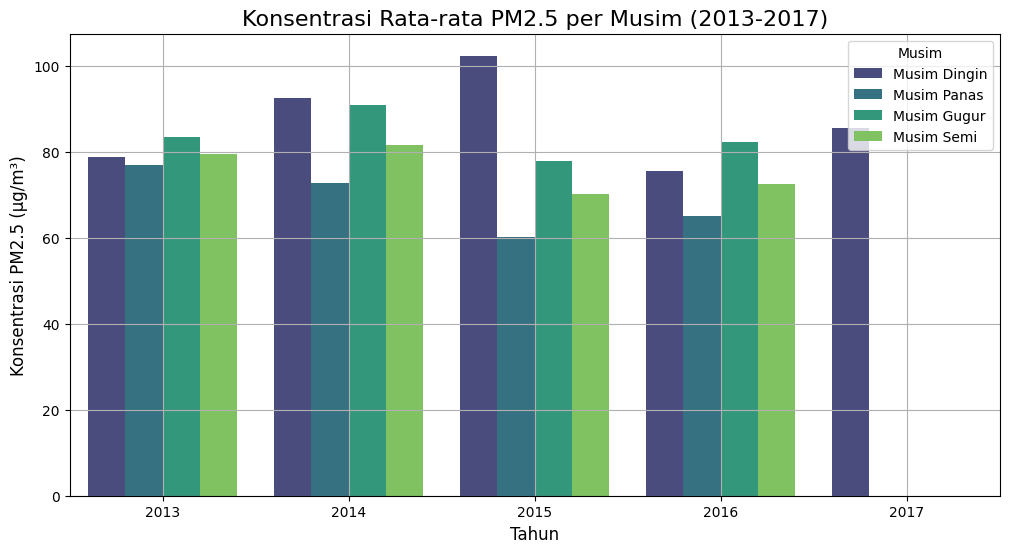

In [119]:
# Membuat clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='mean', hue='musim', data=musim_tahun_stats,
            hue_order=['Musim Dingin', 'Musim Panas', 'Musim Gugur', 'Musim Semi'], palette='viridis')
plt.title('Konsentrasi Rata-rata PM2.5 per Musim (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Musim', loc='upper right')
plt.grid(True)
plt.show()

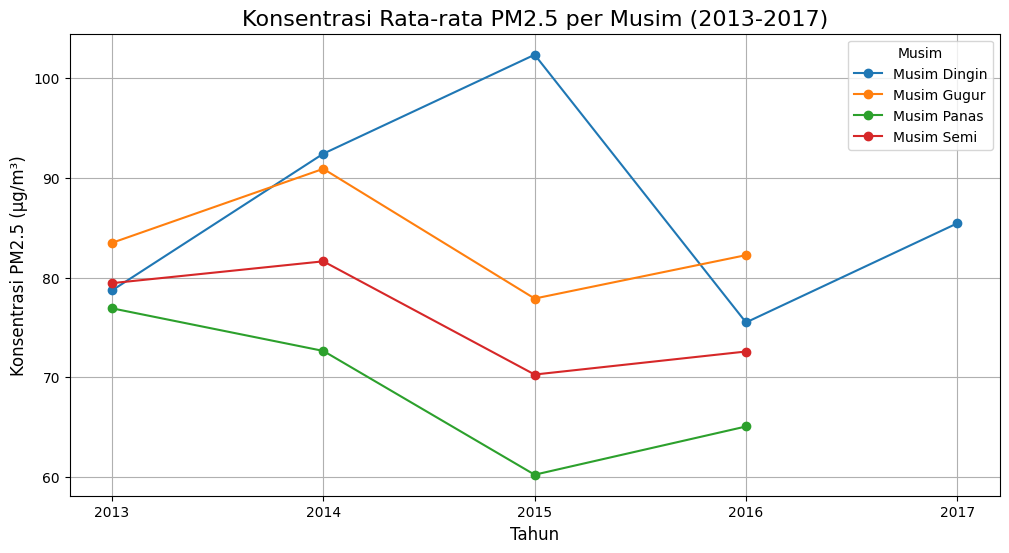

In [120]:
# Membuat line chart dengan garis terpisah untuk setiap musim
plt.figure(figsize=(12, 6))

for musim in musim_tahun_stats['musim'].unique():
    musim_data = musim_tahun_stats[musim_tahun_stats['musim'] == musim]
    plt.plot(musim_data['year'], musim_data['mean'], label=musim, marker='o')

plt.title('Konsentrasi Rata-rata PM2.5 per Musim (2013-2017)', fontsize=16)
plt.xticks(musim_tahun_stats['year'].unique())
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Musim', loc='upper right')
plt.grid(True)
plt.show()

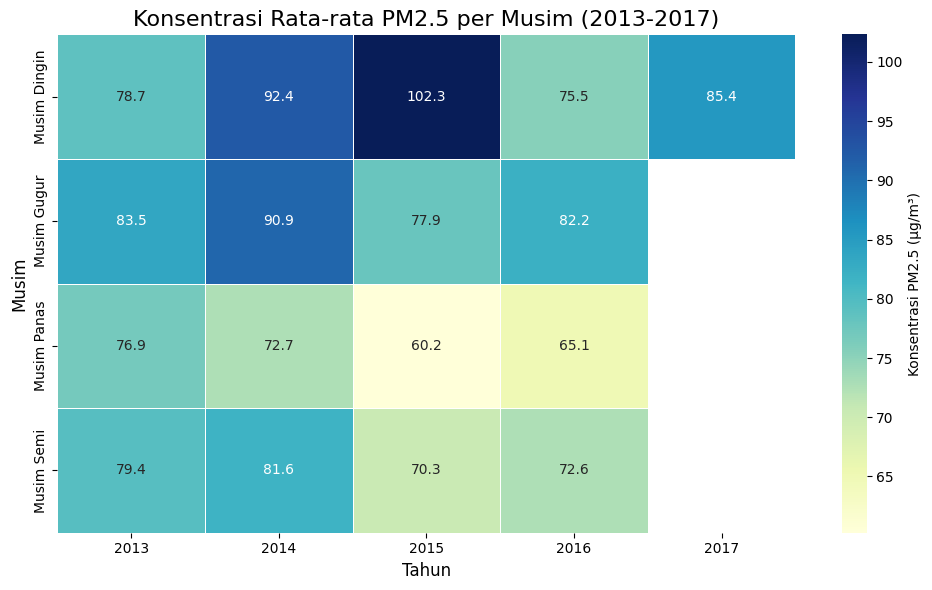

In [121]:
# Pivot data untuk heatmap pertanyaan 1
heatmap_data_1 = musim_tahun_stats.pivot_table(index='musim', columns='year', values='mean')

# Heatmap untuk pertanyaan 1
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_1, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Konsentrasi PM2.5 (µg/m³)'})
plt.title('Konsentrasi Rata-rata PM2.5 per Musim (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Musim', fontsize=12)
plt.tight_layout()
plt.show()

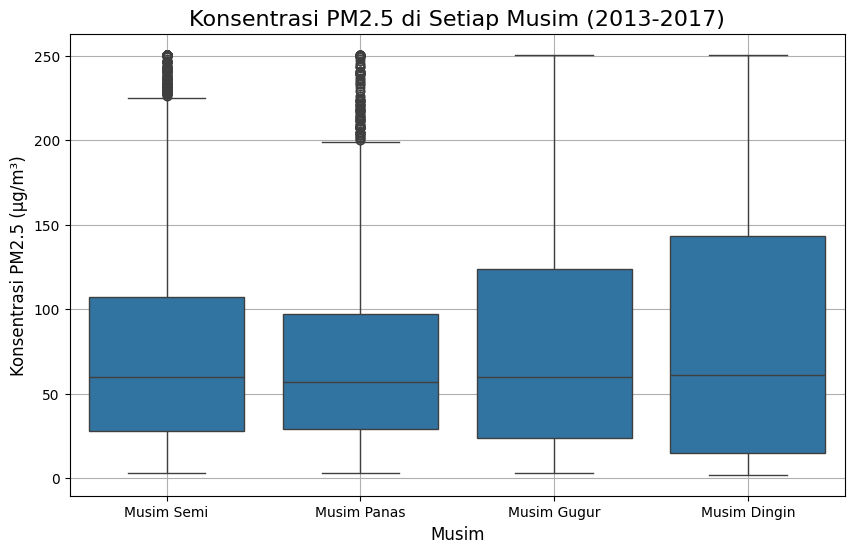

In [122]:
# Visualisasi menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='musim', y='PM2.5', data=df_new, order=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.title('Konsentrasi PM2.5 di Setiap Musim (2013-2017)', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()

### Pertanyaan 2:

<ipython-input-123-6dd4775780d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipe_hari', y='mean', data=tipe_hari_stats, order=['Weekday', 'Weekend'], palette='pastel')


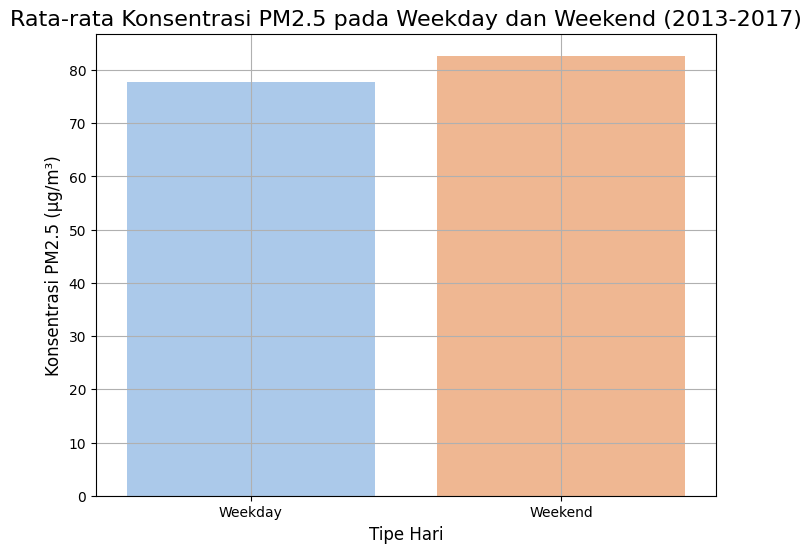

In [123]:
# Agregasi data PM2.5 per tipe hari
tipe_hari_stats = df_new.groupby('tipe_hari')['PM2.5'].agg(['mean']).reset_index()

# Membuat Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='tipe_hari', y='mean', data=tipe_hari_stats, order=['Weekday', 'Weekend'], palette='pastel')
plt.title('Rata-rata Konsentrasi PM2.5 pada Weekday dan Weekend (2013-2017)', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()

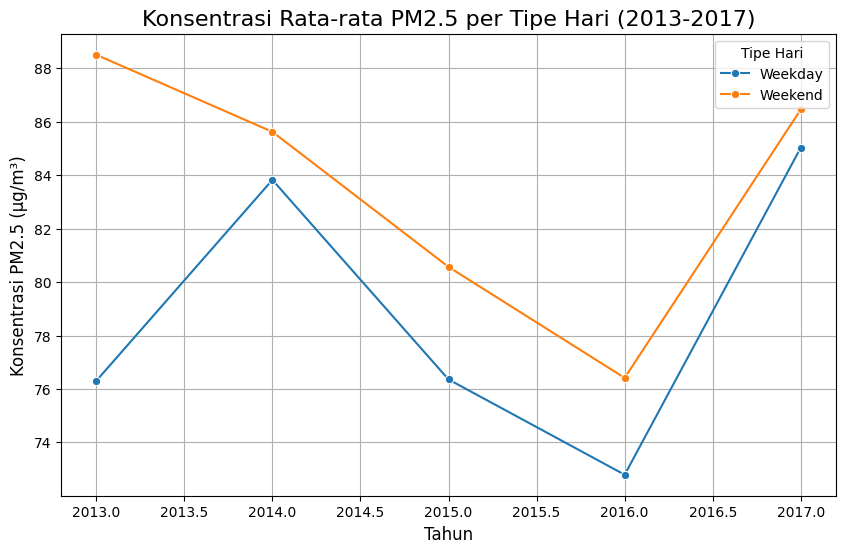

In [124]:
# Agregasi data PM2.5 per tahun dan tipe hari
tipe_hari_tahun_stats = df_new.groupby(['year', 'tipe_hari'])['PM2.5'].agg(['mean']).reset_index()

# Line chart dengan multi-line untuk pertanyaan 2
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='mean', hue='tipe_hari', data=tipe_hari_tahun_stats, marker='o')
plt.title('Konsentrasi Rata-rata PM2.5 per Tipe Hari (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Tipe Hari', loc='upper right')
plt.grid(True)
plt.show()

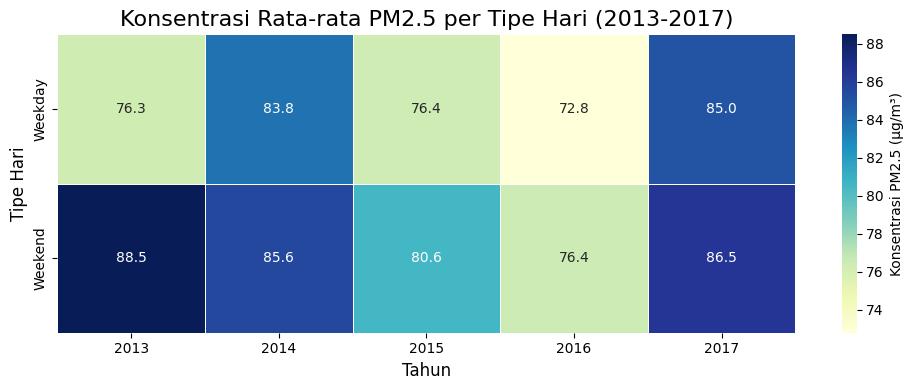

In [125]:
# Pivot data untuk heatmap pertanyaan 2
heatmap_data_2 = tipe_hari_tahun_stats.pivot_table(index='tipe_hari', columns='year', values='mean')

# Heatmap untuk pertanyaan 2
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data_2, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Konsentrasi PM2.5 (µg/m³)'})
plt.title('Konsentrasi Rata-rata PM2.5 per Tipe Hari (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Tipe Hari', fontsize=12)
plt.tight_layout()
plt.show()

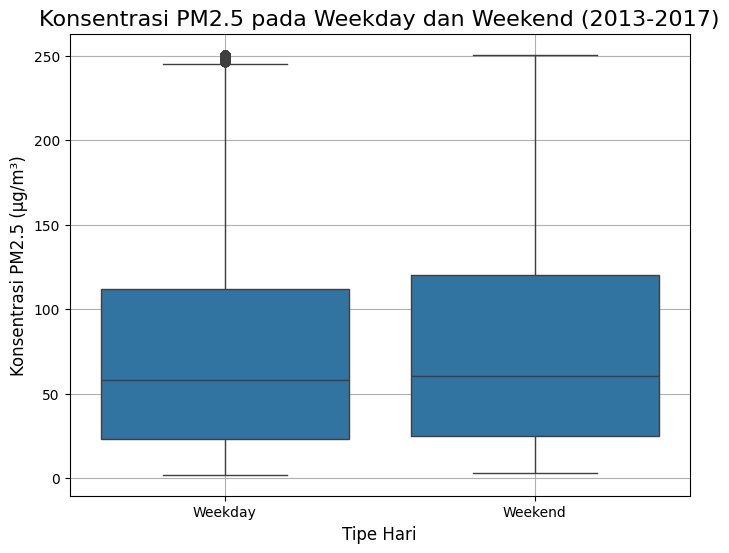

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='tipe_hari', y='PM2.5', data=df_new, order=['Weekday', 'Weekend'])
plt.title('Konsentrasi PM2.5 pada Weekday dan Weekend (2013-2017)', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()

**Insight:**
1. pada grafik line chart, group bar, dan heatmat terlihat konsentrasi PM2.5 paling tinggi terjadi pada musim dingin di setiap tahunnya. Ini terlihat dari garis atau nilai musim dingin yang berada di atas musim lainnya pada grafik, selain itu musim gugur juga cenderung tinggi pada tahun tahun tertentu sedangkan musim semi dan panas cenderung lebih moderat atau rendah. Konsentrasi cenderung meningkat pada musim gugur dan mencapai puncaknya pada musim dingin, kemudian menurun pada musim semi dan mencapai titik terendah pada musim panas. Meskipun ada fluktuasi musiman, terlihat adanya tren penurunan konsentrasi PM2.5 secara keseluruhan dari tahun 2013 hingga 2017. Ini menunjukkan adanya perbaikan kualitas udara di wilayah tersebut. Dilihat dari boxplot juga musim dingin dan gugur nilainya lebih bervariasi dibandingkan dengan musim semi dan panas dimana terlihat datanya lebih stabil di suatu titik (jarang mengalami kondisi ekstrem)

- Baik box plot maupun bar plot menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi pada weekend dibandingkan dengan weekday, pada Box plot juga menunjukkan bahwa variasi konsentrasi PM2.5 lebih besar pada weekend, perbedaan ini mungkin disebabkan oleh aktivitas manusia yang lebih beragam daripada weekday sehingga menghasilkan lebih banyak polusi udara. dilihat dari grafik trend tahunan dan nilai heatmapnya terjadi fluktuasi dimana terjadi penurunan dan kenaikan konsentrasi PM2.5 tiap tahunnya mungkin disebabkan kebijakan penanganan polutan tersebut namun tetap dapat dilihat bahwa konsentrasi PM2.5 di weekend tetap lebih tinggi dibanding weekdays.

## Analisis Lanjutan (Opsional)

Analisis Lanjutan dengan mengelompokkan musim dengan tipe hari untuk mengetahui pengaruh antara keduanya

In [127]:
df_new['musim_tipe_hari'] = df_new['musim'] + '_' + df_new['tipe_hari']

# Statistik deskriptif PM2.5 per musim dan tipe hari
musim_tipe_hari_stats = df_new.groupby('musim_tipe_hari')['PM2.5'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Statistik Deskriptif PM2.5 per Musim dan Tipe Hari:\n", musim_tipe_hari_stats)

Statistik Deskriptif PM2.5 per Musim dan Tipe Hari:
                            mean  median        std  min    max
musim_tipe_hari                                               
Musim Dingin_Weekday  84.385304    56.0  81.124089  2.0  250.5
Musim Dingin_Weekend  98.269077    76.0  85.219022  3.0  250.5
Musim Gugur_Weekday   80.702997    60.0  69.211573  3.0  250.5
Musim Gugur_Weekend   90.952644    58.0  82.535530  3.0  250.5
Musim Panas_Weekday   68.427020    57.0  49.327084  3.0  250.5
Musim Panas_Weekend   69.464033    57.0  51.590159  3.0  250.5
Musim Semi_Weekday    77.265394    60.0  63.939017  3.0  250.5
Musim Semi_Weekend    72.828500    61.0  55.940250  3.0  250.5


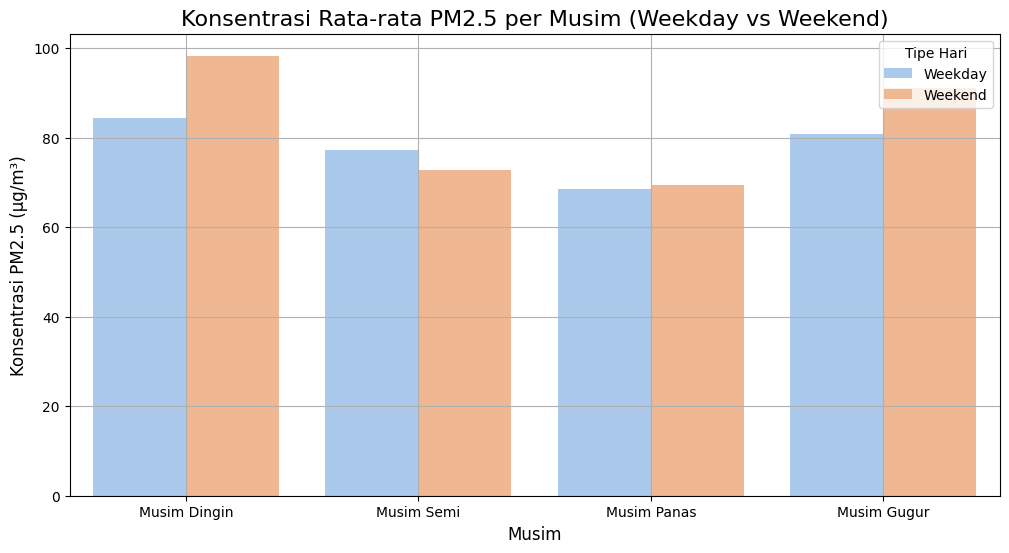

In [128]:
# Agregasi data PM2.5 per musim dan tipe hari
musim_tipe_hari_stats = df_new.groupby(['musim', 'tipe_hari'])['PM2.5'].agg(['mean']).reset_index()

# Clustered bar chart dengan pengelompokan
plt.figure(figsize=(12, 6))
sns.barplot(x='musim', y='mean', hue='tipe_hari', data=musim_tipe_hari_stats,
            order=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'], palette='pastel')
plt.title('Konsentrasi Rata-rata PM2.5 per Musim (Weekday vs Weekend)', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Tipe Hari', loc='upper right')
plt.grid(True)
plt.show()

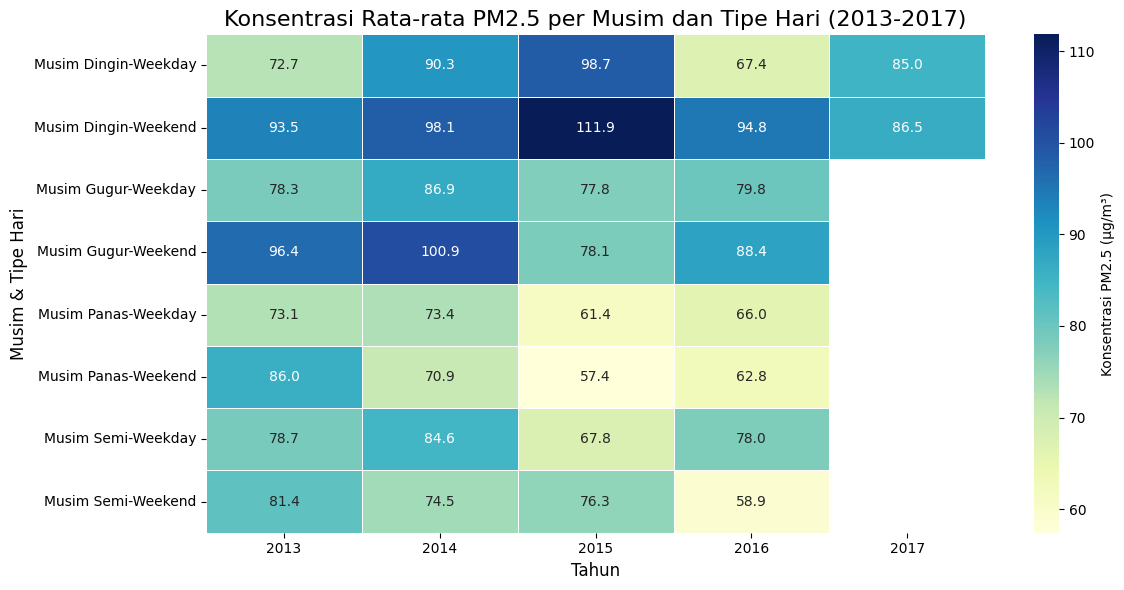

In [129]:
# Agregasi data PM2.5 per tahun, musim, dan tipe hari
musim_tipe_hari_tahun_stats = df_new.groupby(['year', 'musim', 'tipe_hari'])['PM2.5'].agg(['mean']).reset_index()

# Pivot data untuk heatmap
heatmap_data = musim_tipe_hari_tahun_stats.pivot_table(index=['musim', 'tipe_hari'], columns='year', values='mean')

# Heatmap dengan tahun sebagai dimensi (ukuran sel)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Konsentrasi PM2.5 (µg/m³)'})
plt.title('Konsentrasi Rata-rata PM2.5 per Musim dan Tipe Hari (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Musim & Tipe Hari', fontsize=12)
plt.tight_layout()
plt.show()

- Musim Dingin memiliki konsentrasi PM2.5 tertinggi, Baik pada weekday maupun weekend, musim dingin menunjukkan rata-rata dan median konsentrasi PM2.5 yang paling tinggi dibandingkan musim lainnya. Ini menunjukkan bahwa musim dingin merupakan periode dengan kualitas udara terburuk terkait PM2.5. Weekend di musim dingin memiliki konsentrasi PM2.5 lebih tinggi, Meskipun musim dingin secara umum memiliki konsentrasi PM2.5 tinggi, weekend di musim dingin menunjukkan rata-rata dan median yang lebih tinggi lagi dibandingkan weekday. Hal ini mungkin mengindikasikan adanya faktor lain selain aktivitas harian yang berkontribusi terhadap peningkatan PM2.5 di weekend musim dingin, seperti pemanas ruangan atau aktivitas rekreasi yang menghasilkan emisi.
- Musim Panas memiliki konsentrasi PM2.5 terendah, baik pada weekday maupun weekend, musim panas menunjukkan rata-rata dan median konsentrasi PM2.5 yang paling rendah. Ini menunjukkan kualitas udara yang relatif lebih baik di musim panas.
- Perbedaan weekday dan weekend tidak konsisten di semua musim, perbedaan konsentrasi PM2.5 antara weekday dan weekend tidak selalu konsisten di semua musim. Di musim dingin dan gugur, konsentrasi PM2.5 pada weekend cenderung lebih tinggi, sedangkan di musim semi dan panas, perbedaannya tidak terlalu signifikan.
- Variasi konsentrasi PM2.5 menunjukkan Musim dingin dan gugur memiliki variasi konsentrasi PM2.5 yang lebih besar dibandingkan musim semi dan panas. Hal ini menunjukkan bahwa konsentrasi PM2.5 di musim dingin dan gugur lebih fluktuatif.

## Conclusion

- Konsentrasi PM2.5 tertinggi terjadi pada musim dingin, diikuti oleh musim gugur, musim semi, dan musim panas. Hal ini terlihat dari rata-rata dan median konsentrasi PM2.5 yang lebih tinggi pada musim dingin dan gugur dibandingkan musim lainnya. Terdapat tren penurunan konsentrasi PM2.5 dari tahun 2013 hingga 2017 di semua musim, meskipun dengan fluktuasi tahunan. Ini menunjukkan adanya perbaikan kualitas udara terkait PM2.5 di wilayah tersebut. Variasi konsentrasi PM2.5 lebih besar pada musim dingin dan gugur, yang ditunjukkan oleh standar deviasi yang lebih tinggi mungkin disebabkan oleh aktifitas tertentu di musim tersebut.

- Pola konsentrasi PM2.5 di weekend cenderung selalu lebih tinggi dibandingkan dengan weekdays terlihat dari rata rata dan median selama periode dan tiap tahunnya. dilihat dari variasinya weeekend lebih bervariasi mungkin dikarenakan terjadinya beragam aktifitas di weekend dibanding weekdays yang stabil. terlihat juga terdapat fluktuasi turun yang lebih banyak dari konsentrasi di tiap tahunnya mungkin menunjukkan adanya upaya penanggulangan kondisi ini.

- pada analisis lanjutan dimana meninjau konsentrasi PM2.5 di weekend dan weekdays padaa tiap musim sepanjang tahun juga menunjukkan adanya pola peningkatan di musim dingin dan musim gugur terutama di weekend sehingga perlu perhatian khusus di kondisi tersebut untuk menangani masalah polutan PM2.5 yang membahayakan kesehatan ini.